In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_data_challenge_rung_1.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 4945 pickle(s) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [3]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

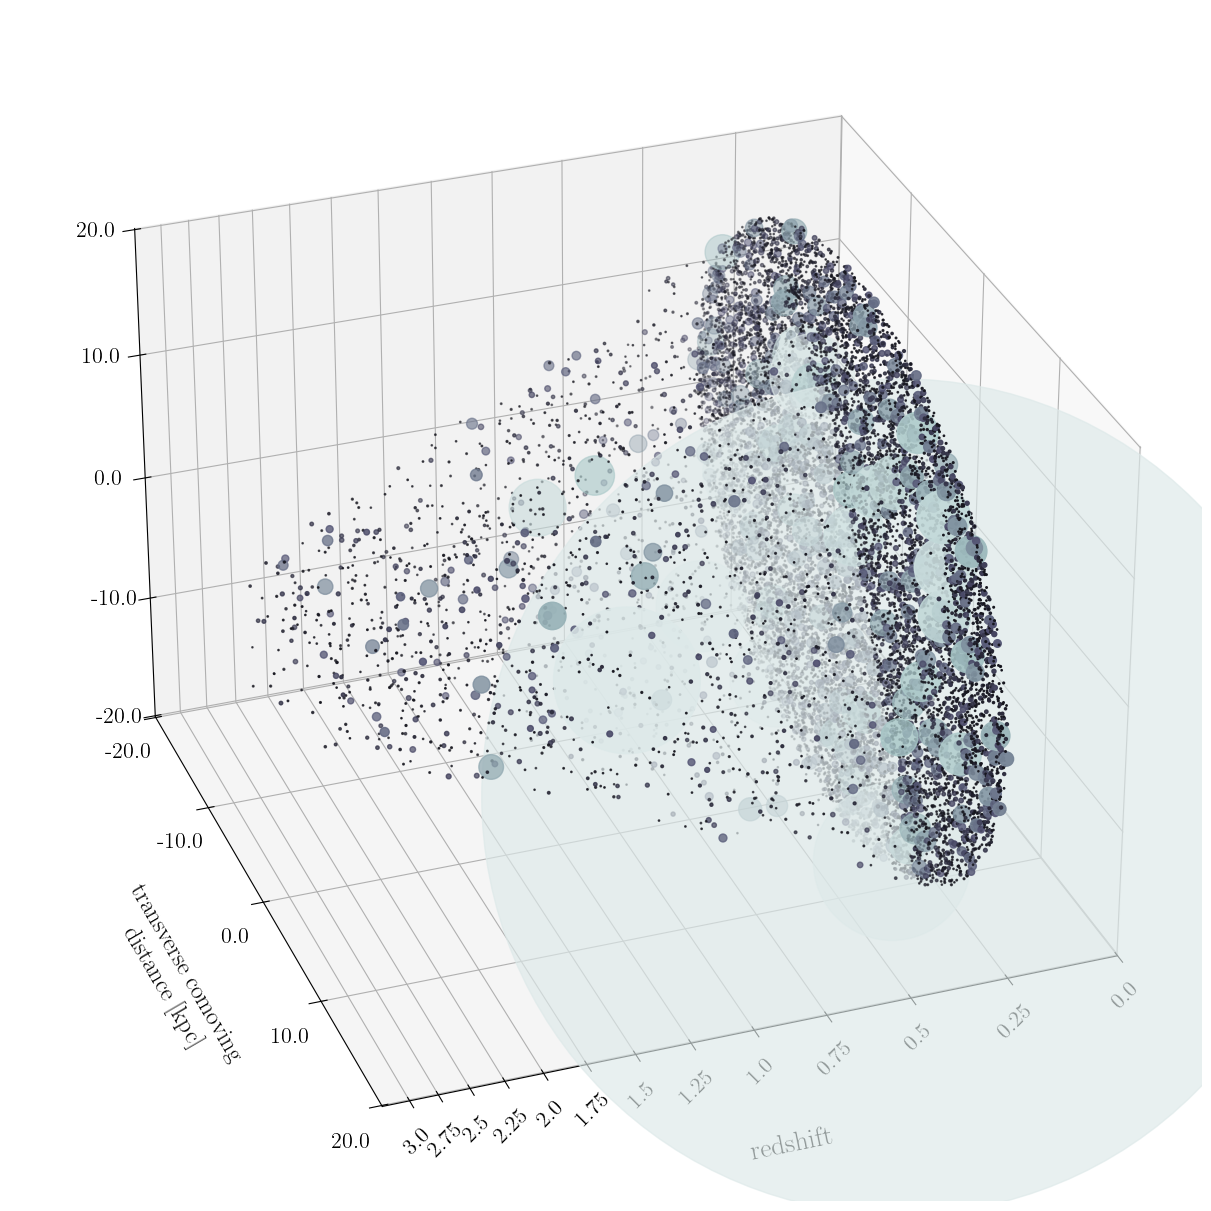

In [4]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

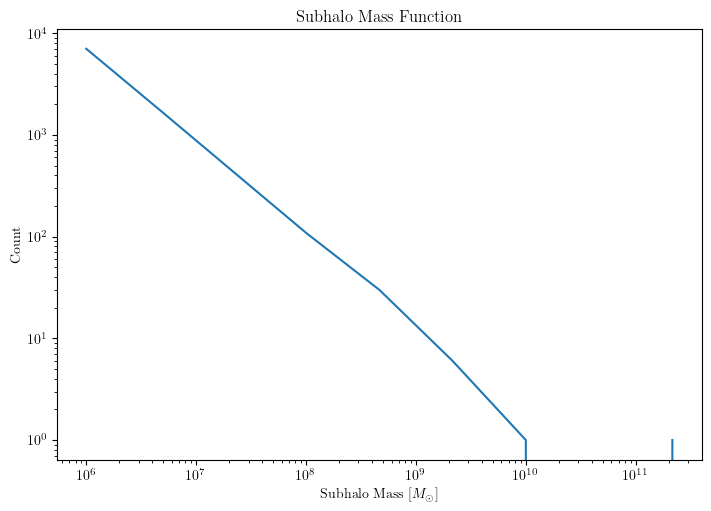

In [5]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.show()

In [6]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 4.77e+11 Msun

{'_alphaRs': 1.1948036147974701e-05,
 '_args': {'gamma_inner': 2.0, 'gamma_outer': 5.0, 'x_match': 'c'},
 '_c': 5.223788653214767,
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f5a4db8dd20>,
 '_lenstronomy_args': [{'Rs': 0.0002814649,
                        'alpha_Rs': 1.1948e-05,
                        'center_x': 1.3626,
                        'center_y': -2.2875,
                        'gamma_inner': 2.0,
                        'gamma_outer': 5.0}],
 '_nfw_halo': <pyHalo.Halos.HaloModels.TNFW.TNFWSubhalo object at 0x7f5a4c5e8a00>,
 '_nfw_params': [15216064.42127596, 11.43111689762598, 59.71373874339018],
 '_prof': <lenstronomy.LensModel.Profiles.pseudo_double_powerlaw.PseudoDoublePowerlaw object at 0x7f5a4c5e90f0>,
 '_profile_args': (5.223788653214767, 2.0, 5.0),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_z_infall': 3.0368471505912087,
 '_zeval': 3.0368471505912087,
 'fixed_position': False,
 'is_subhalo': True,
 '

# Review failed systems

In [7]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 10274 lens(es) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [8]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

384 failed out of 10274 systems, 3.74 percent


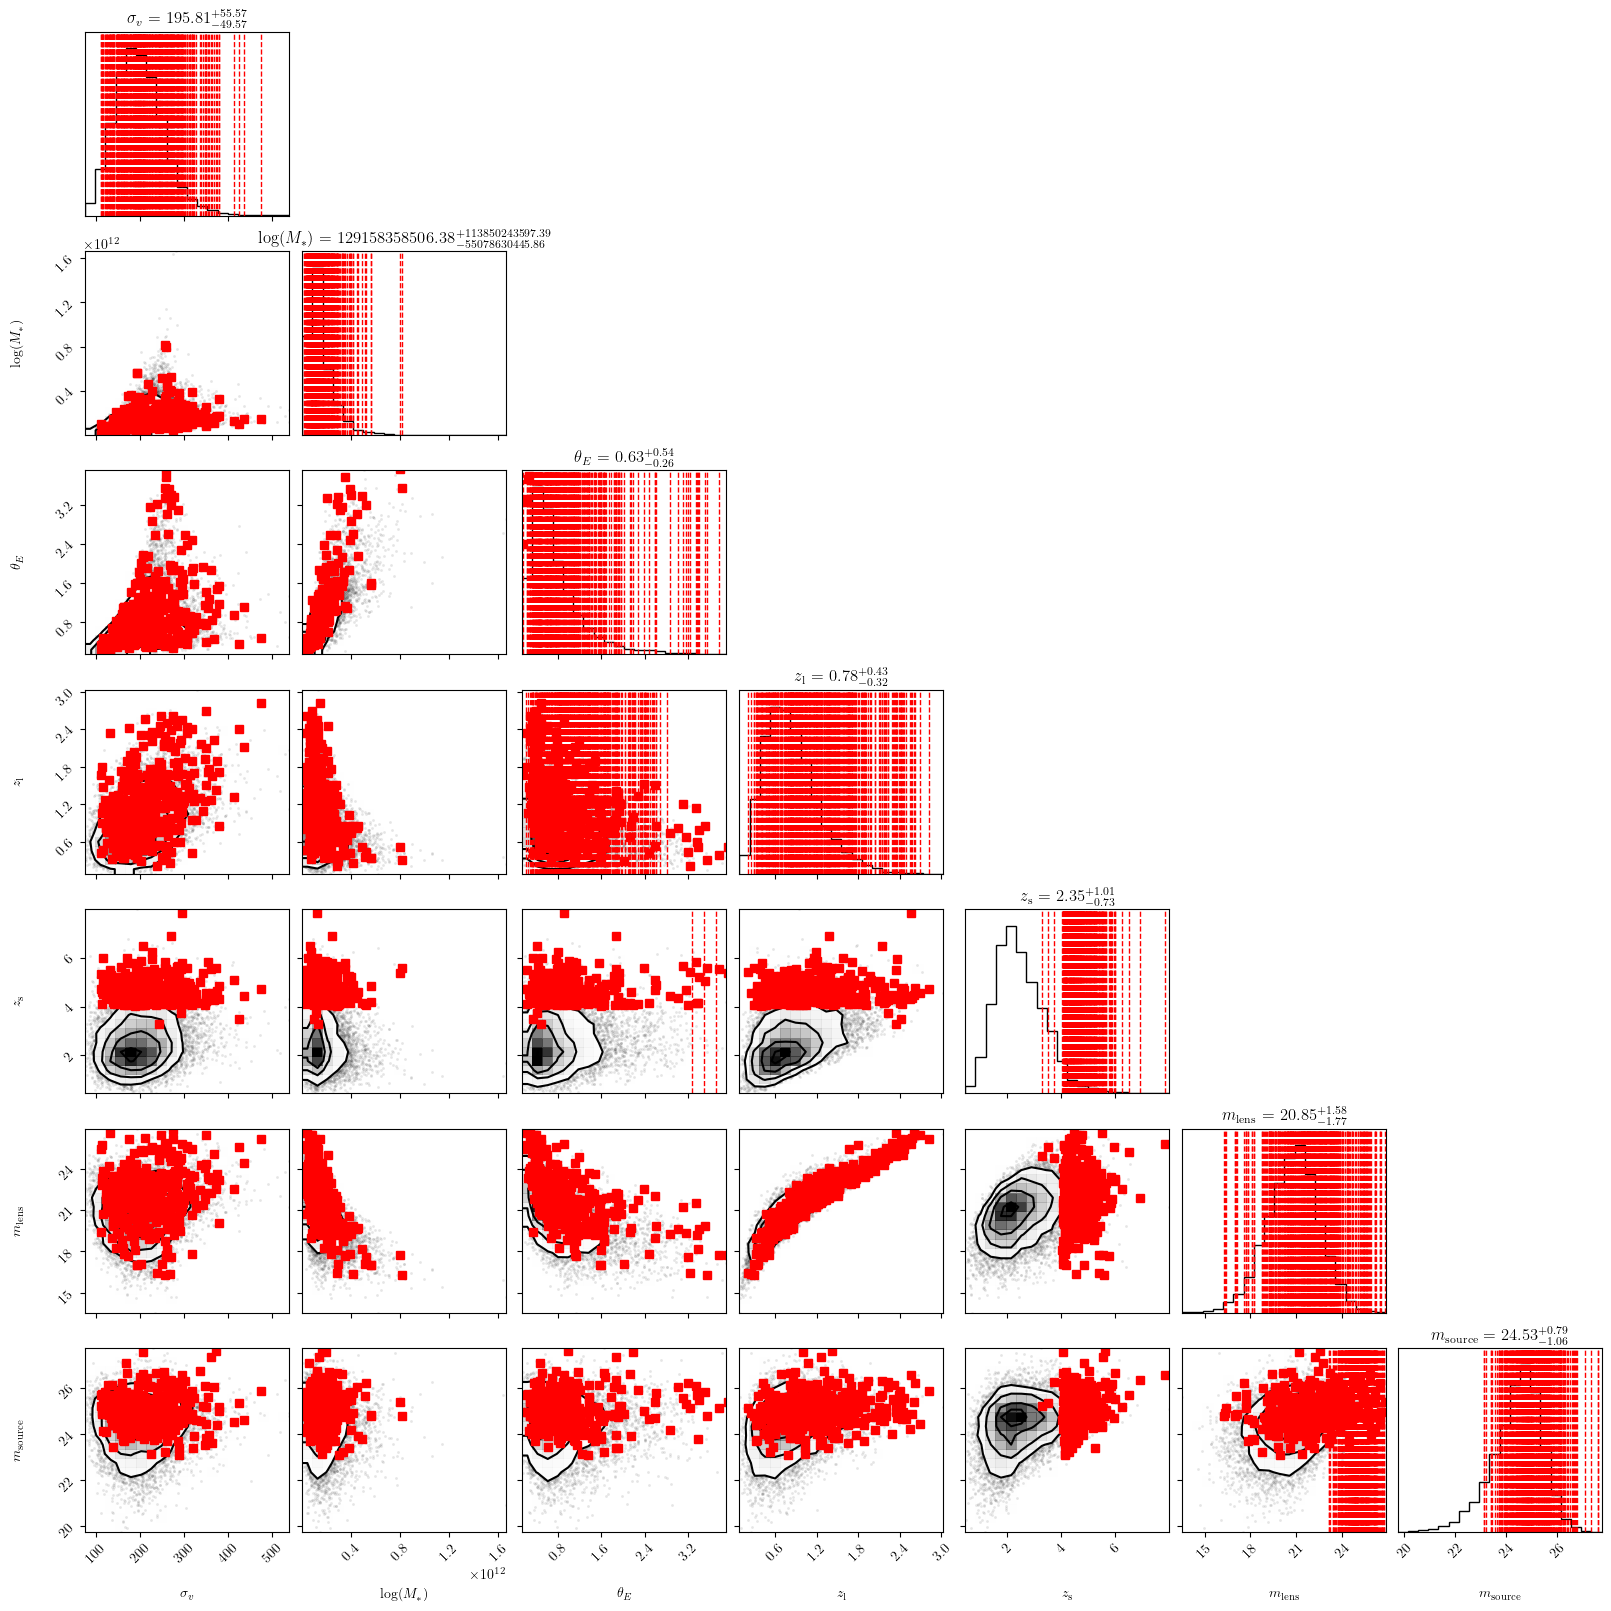

In [9]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)